In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
sys.path.append('../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [57]:
%matplotlib notebook

In [58]:
# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

2019-08-02


In [59]:
# Loading in the compressed dataset 1
Flattenedfilename_1 = 'case1.1/Segments2_compr_flat_filt.npz'; print(Flattenedfilename_1)
flattenedfile_1 = np.load(Flattenedfilename_1)
xgridtot_1 = flattenedfile_1['xgridtot']
ygridtot_1 = flattenedfile_1['ygridtot']
zgridtot_1 = flattenedfile_1['zgridtot']
nsegments_1 = (len(xgridtot_1)); print(nsegments_1)

# Loading in the compressed dataset 2
Flattenedfilename_2 = 'case1.2/Segments2_compr_flat_filt.npz'; print(Flattenedfilename_2)
flattenedfile_2 = np.load(Flattenedfilename_2)
xgridtot_2 = flattenedfile_2['xgridtot']
ygridtot_2 = flattenedfile_2['ygridtot']
zgridtot_2 = flattenedfile_2['zgridtot']
nsegments_2 = (len(xgridtot_2)); print(nsegments_2)

case1.1/Segments2_compr_flat_filt.npz
12
case1.2/Segments2_compr_flat_filt.npz
12


Correlation of random signals = 2.4946623367789664
for segment  0


<IPython.core.display.Javascript object>


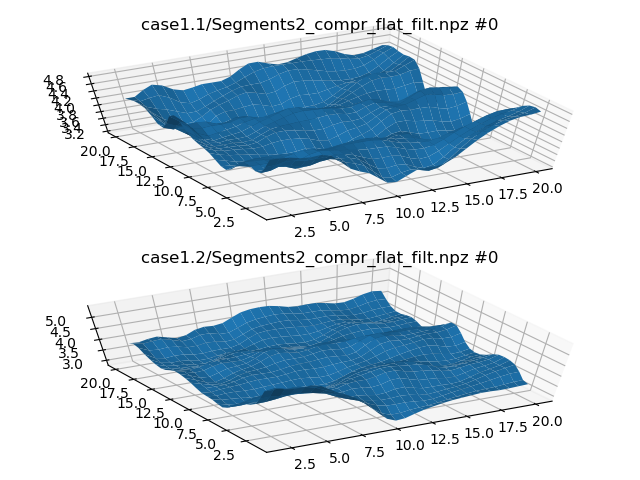

correlation matrix for segment 0:
[[100.          61.65981651]
 [  0.         100.        ]]

for segment  1


<IPython.core.display.Javascript object>


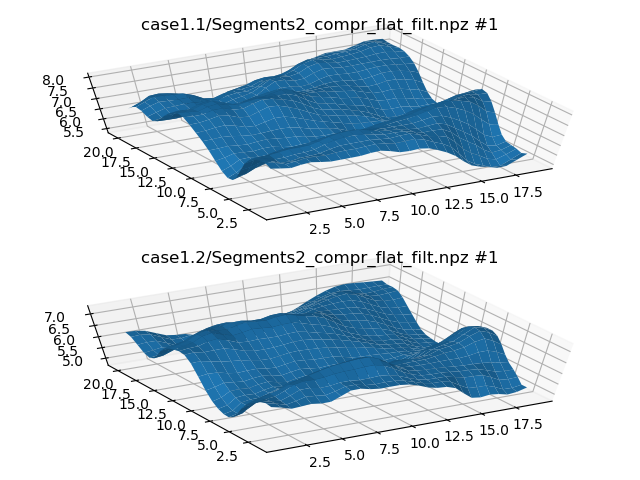

correlation matrix for segment 1:
[[100.          79.87786654]
 [  0.         100.        ]]

for segment  2


<IPython.core.display.Javascript object>


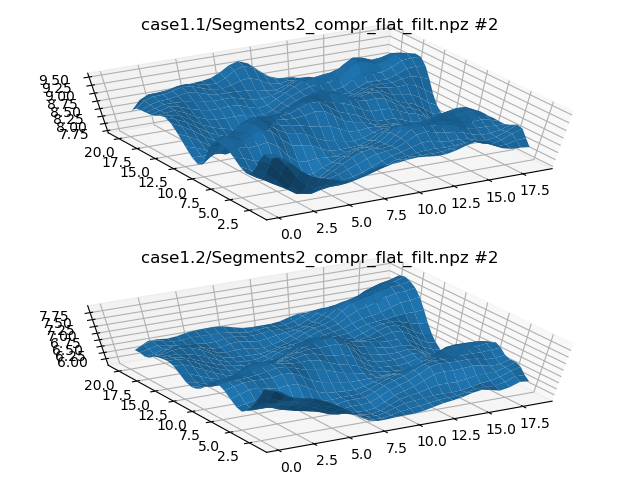

correlation matrix for segment 2:
[[100.          72.84084078]
 [  0.         100.        ]]

for segment  3


<IPython.core.display.Javascript object>


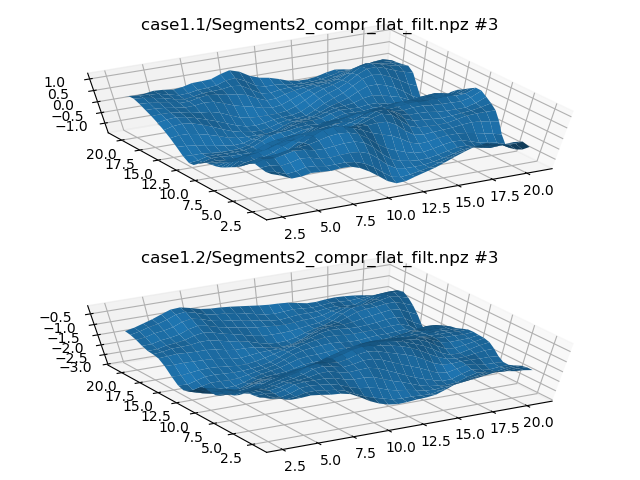

correlation matrix for segment 3:
[[100.          91.25528971]
 [  0.         100.        ]]

for segment  4


<IPython.core.display.Javascript object>


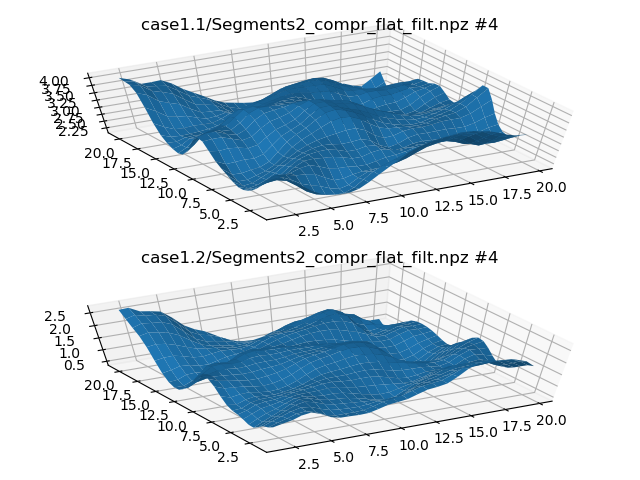

correlation matrix for segment 4:
[[100.          77.24120171]
 [  0.         100.        ]]

for segment  5


<IPython.core.display.Javascript object>


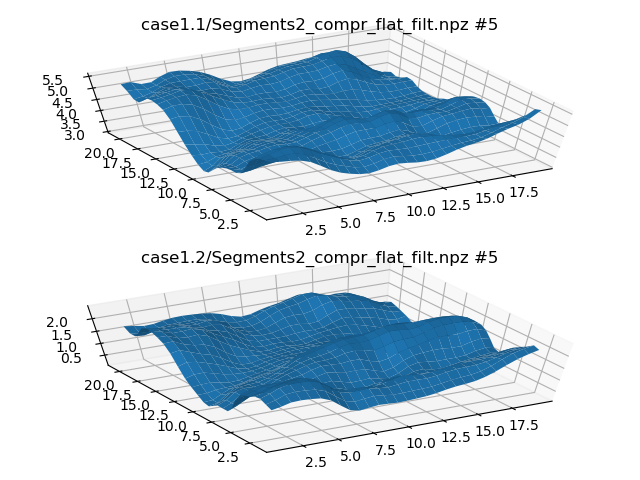

correlation matrix for segment 5:
[[100.        70.472136]
 [  0.       100.      ]]

for segment  6


<IPython.core.display.Javascript object>


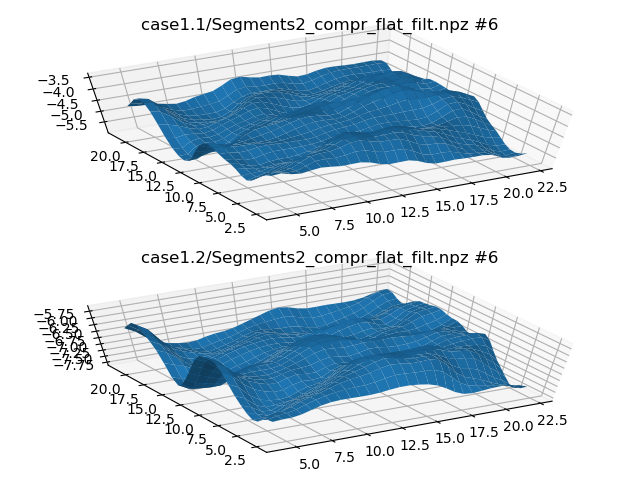

correlation matrix for segment 6:
[[100.          78.41359801]
 [  0.         100.        ]]

for segment  7


<IPython.core.display.Javascript object>


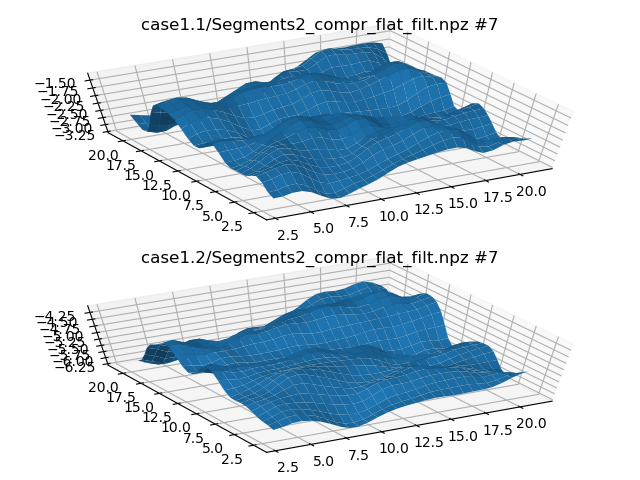

correlation matrix for segment 7:
[[100.          81.21611521]
 [  0.         100.        ]]

for segment  8


<IPython.core.display.Javascript object>


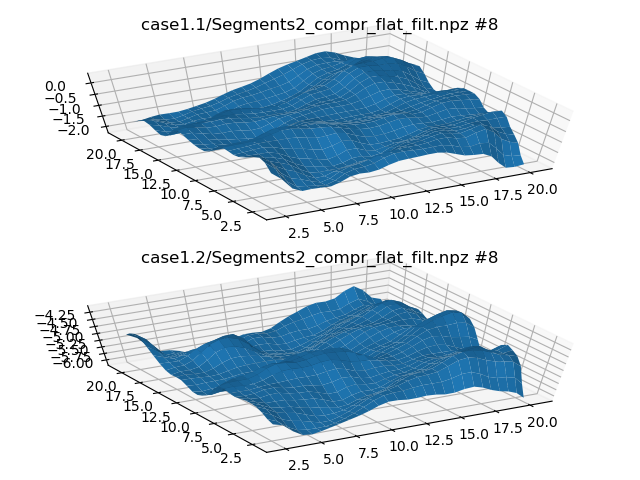

correlation matrix for segment 8:
[[100.          65.40032797]
 [  0.         100.        ]]

for segment  9


<IPython.core.display.Javascript object>


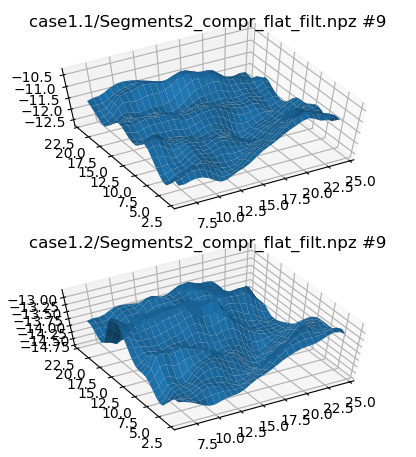

correlation matrix for segment 9:
[[100.          70.46719903]
 [  0.         100.        ]]

for segment  10


<IPython.core.display.Javascript object>


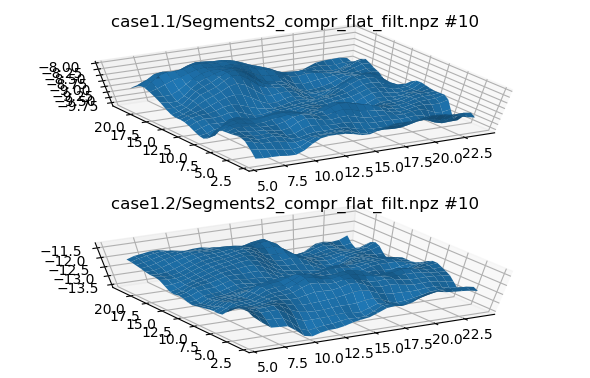

correlation matrix for segment 10:
[[100.          63.18163908]
 [  0.         100.        ]]

for segment  11


<IPython.core.display.Javascript object>


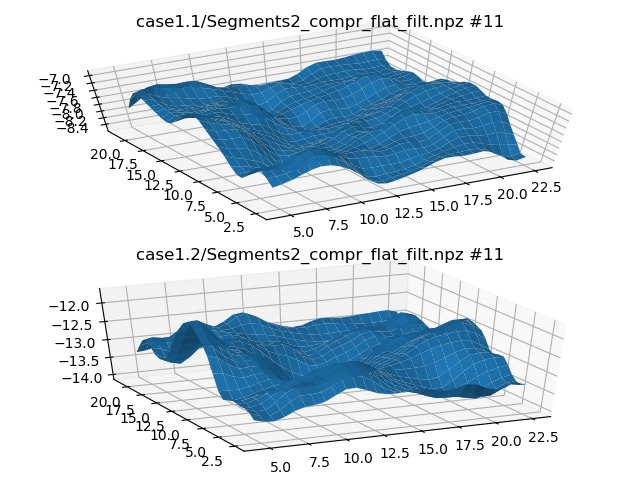

correlation matrix for segment 11:
[[100.          68.18624328]
 [  0.         100.        ]]

Average correlation =  0.7335102281872974


In [60]:
# Looping over segments (assuming 1 and 2 have the same dimensions)
print('Correlation of random signals =', sts.randomcorrelation(nacross,ndown)*100)
correlationlist = []
azim=-120; elev=60
for isegment in range(nsegments_1):

    # Pull out the next segment
    print('for segment ', isegment)
    isegment_1 = isegment
    isegment_2 = isegment
    sollast_1 = zgridtot_1[isegment_1] 
    sollast_2 = zgridtot_2[isegment_2]

    # Shorten if necessary
    ny_1, nx_1 = np.shape(sollast_1); #print(ny_1, nx_1)
    ny_2, nx_2 = np.shape(sollast_2); #print(ny_2, nx_2)
    if (ny_1 < ny_2):
        ny = ny_1
    else:
        ny = ny_2
    if (nx_1 < nx_2):
        nx = nx_1
    else:
        nx = nx_2
    sollast_1_temp = sollast_1[0:ny,0:nx]
    sollast_2_temp = sollast_2[0:ny,0:nx]

    # Assuming the x- and y- grids are the same
    xgrid_temp = xgridtot_1[isegment_1][0:ny,0:nx]
    ygrid_temp = ygridtot_1[isegment_2][0:ny,0:nx]

    # Graph the surfaces
    fig = plt.figure()
    
    ax1 = fig.add_subplot(211, projection='3d')
    ax1.plot_surface(xgrid_temp, ygrid_temp, sollast_1_temp)
    title = Flattenedfilename_1+' #'+str(isegment_1)
    ax1.set_title(title)
    ax1.view_init(azim=azim,elev=elev)
    
    ax2 = fig.add_subplot(212, projection='3d')
    ax2.plot_surface(xgrid_temp, ygrid_temp, sollast_2_temp)
    title = Flattenedfilename_2+' #'+str(isegment_2)
    ax2.set_title(title)
    ax2.view_init(azim=azim,elev=elev)

    # Get the correlation
    infomatrix = sts.getinfomatrix([sollast_1_temp,sollast_2_temp])
    print('correlation matrix for segment '+str(isegment)+':')
    print(infomatrix*100)
    correlationlist.append(infomatrix[0,1])
    print('')
    
print('Average correlation = ',np.mean(correlationlist))